### GROUP 07
1. TOM TITO
2. LIM TECHCHHIV
3. VUTHY CHEANGSRUN
4. LEANG KIMLONG
5. MOURN SUNRA

## TITLE: Electricity Price Prediction

In [1]:
import pandas as pd

data = pd.read_csv('electricity.csv')

data.head()

C:\Users\USer\AppData\Local\Temp\ipykernel_19904\1740771241.py:3: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('electricity.csv')


,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [2]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

(38014, 18)

## Data Preprocessing

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

features = data.columns.tolist()[9:]

print('Dataset that is NaN\n')
print(data.isnull().sum())

# drop irrelavent columns
new_ds = data.drop(columns=['Holiday','DateTime','HolidayFlag'])

temp = new_ds

# Converting Columns to Numeric, if the column doesn't conver to num, it will be NaN
for feature in features:
    temp[feature] = temp[feature].apply(pd.to_numeric, errors='coerce')

print('\n\nDataset that is not numerical\n')
print(temp.isnull().sum())

Dataset that is NaN

DateTime                      0
Holiday                   36478
HolidayFlag                   0
DayOfWeek                     0
WeekOfYear                    0
Day                           0
Month                         0
Year                          0
PeriodOfDay                   0
ForecastWindProduction        0
SystemLoadEA                  0
SMPEA                         0
ORKTemperature                0
ORKWindspeed                  0
CO2Intensity                  0
ActualWindProduction          0
SystemLoadEP2                 0
SMPEP2                        0
dtype: int64


Dataset that is not numerical

DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity               

## Exploratory Data Analysis (EDA)

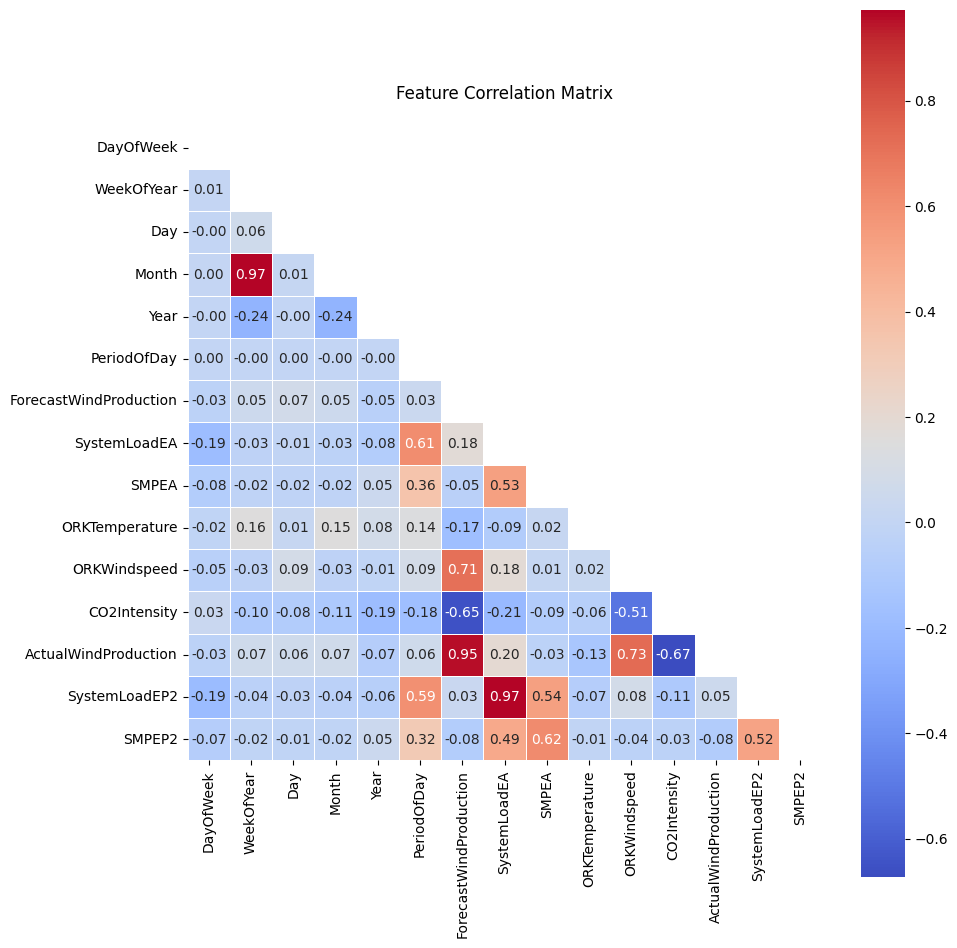

In [7]:
# Import required libraries if not already imported
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Correlation Analysis
plt.figure(figsize=(10, 10))
correlation_matrix = new_ds.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', pad=20)
plt.tight_layout()
plt.show()


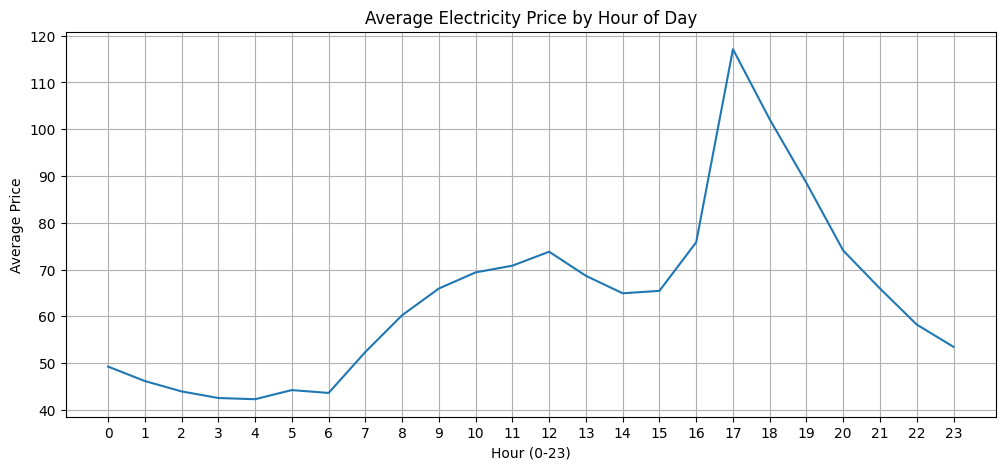

In [9]:
plt.figure(figsize=(12, 5))
hourly_avg = new_ds.groupby(pd.to_numeric(new_ds['PeriodOfDay']) // 2)['SMPEP2'].mean()

plt.plot(hourly_avg.index, hourly_avg.values)
plt.title('Average Electricity Price by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

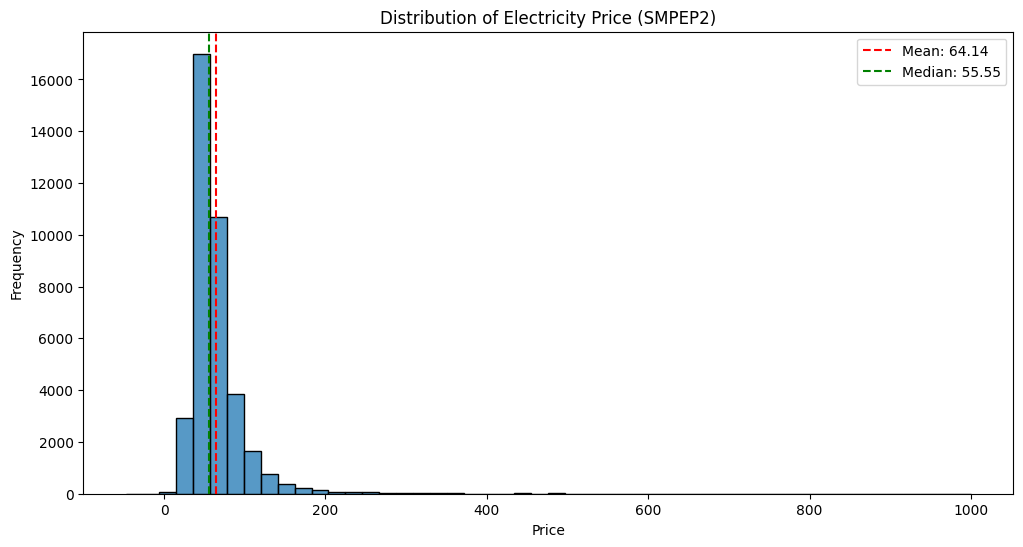

In [10]:
# Distribution of Target Variable (SMPEP2)
plt.figure(figsize=(12, 6))
sns.histplot(data=new_ds, x='SMPEP2', bins=50)
plt.title('Distribution of Electricity Price (SMPEP2)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(new_ds['SMPEP2'].mean(), color='red', linestyle='--', label=f'Mean: {new_ds["SMPEP2"].mean():.2f}')
plt.axvline(new_ds['SMPEP2'].median(), color='green', linestyle='--', label=f'Median: {new_ds["SMPEP2"].median():.2f}')
plt.legend()
plt.show()

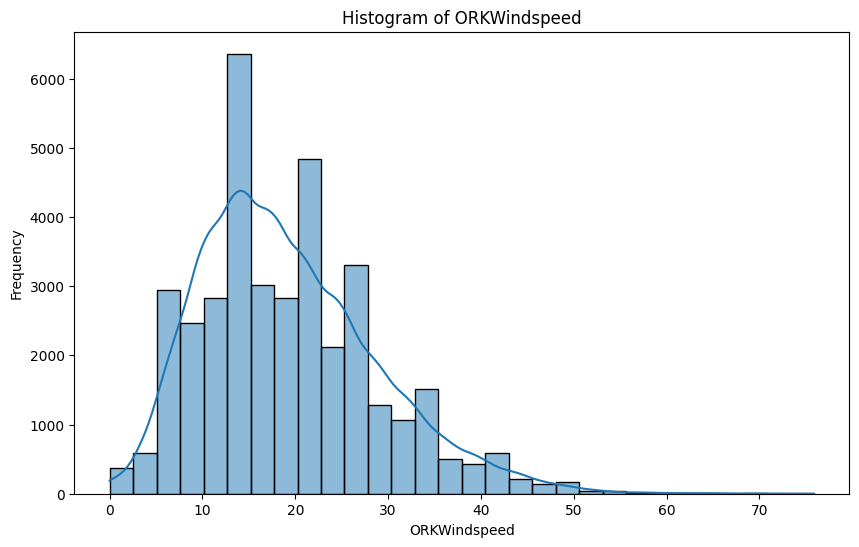

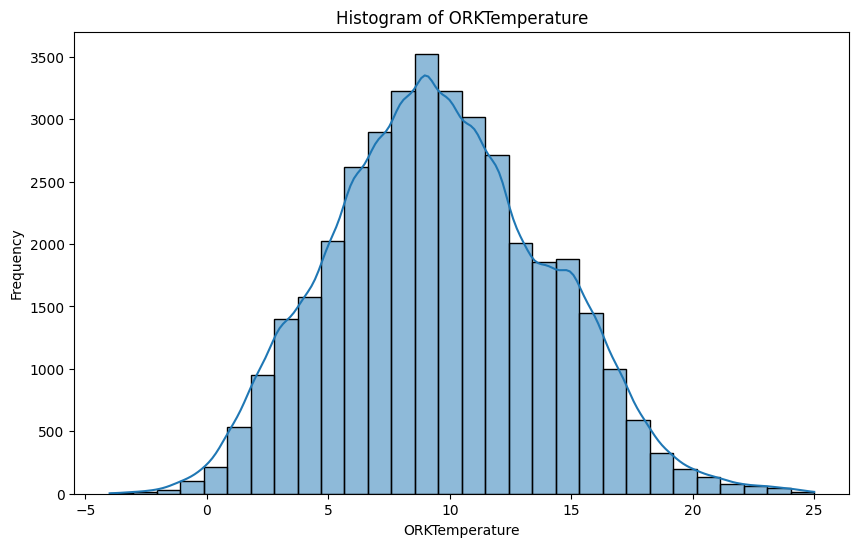

In [11]:
# Plot the missing value
for feature in ['ORKWindspeed', 'ORKTemperature']:
    plt.figure(figsize=(10, 6))
    sns.histplot(temp[feature], bins=30, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

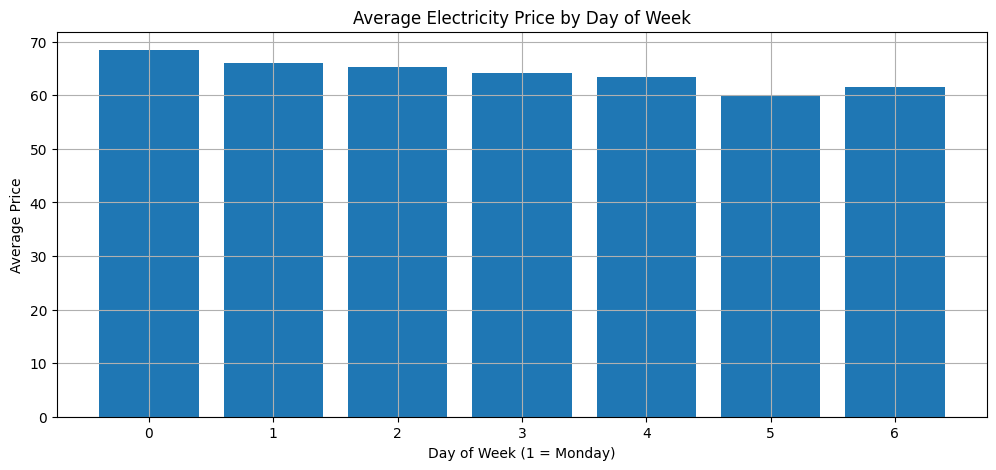

In [12]:
# Average price by day of week
plt.figure(figsize=(12, 5))
daily_avg = new_ds.groupby('DayOfWeek')['SMPEP2'].mean()
plt.bar(daily_avg.index, daily_avg.values)
plt.title('Average Electricity Price by Day of Week')
plt.xlabel('Day of Week (1 = Monday)')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [13]:
# Print summary statistics
print("\nSummary Statistics for Key Features:")
print("=" * 50)
print(new_ds[['SMPEP2', 'ActualWindProduction', 'SystemLoadEP2', 'ORKTemperature', 'CO2Intensity']].describe())

# Print correlation with target
print("\nCorrelation with Target Variable (SMPEP2):")
print("=" * 50)
correlations = new_ds.corr()['SMPEP2'].sort_values(ascending=False)
print(correlations)


Summary Statistics for Key Features:
             SMPEP2  ActualWindProduction  SystemLoadEP2  ORKTemperature  \
count  38012.000000          38009.000000   38012.000000    37719.000000   
mean      64.136823            520.762819    3785.973841        9.626369   
std       35.415036            378.282975     843.269455        4.439934   
min      -47.740000              1.000000    1809.960000       -4.000000   
25%       45.780000            199.000000    3058.277500        6.000000   
50%       55.545000            445.000000    3865.745000        9.000000   
75%       72.110000            793.000000    4427.590000       13.000000   
max     1000.000000           1769.000000    6309.750000       25.000000   

       CO2Intensity  
count  38007.000000  
mean     479.373040  
std       85.354706  
min        0.000000  
25%      421.105000  
50%      480.310000  
75%      537.520000  
max      842.880000  

Correlation with Target Variable (SMPEP2):
SMPEP2                    1.000000


### Handle Missing Value

In [14]:
# For normally distributed variables (Mean)
normal_vars = ['ORKTemperature']

# For time series variables (Forward Fill)
time_vars = ['ORKWindspeed']

for var in normal_vars:
    new_ds[var] = new_ds[var].fillna(new_ds[var].mean())

for var in time_vars:
    new_ds[var] = new_ds[var].ffill()
    
new_ds = new_ds.dropna()

print("\nRemaining missing values after replacing: \n")
print(new_ds.apply(pd.to_numeric, errors='coerce').isnull().sum())


Remaining missing values after replacing: 

DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64


### Preparing Feature and Target

In [23]:
new_ds['Hour'] = pd.to_numeric(new_ds['PeriodOfDay'])
new_ds['DayOfWeek'] = pd.to_numeric(new_ds['DayOfWeek'])
new_ds['Month'] = pd.to_numeric(new_ds['Month'])

x = new_ds[['ActualWindProduction', 'SystemLoadEP2', 'SMPEA', 'SystemLoadEA', 'ForecastWindProduction', 
     'DayOfWeek', 'Year','ORKTemperature', 'ORKWindspeed', 'CO2Intensity', 'PeriodOfDay']]
y = new_ds['SMPEP2']

x

C:\Users\USer\AppData\Local\Temp\ipykernel_19904\2455240192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds['Hour'] = pd.to_numeric(new_ds['PeriodOfDay'])
C:\Users\USer\AppData\Local\Temp\ipykernel_19904\2455240192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ds['DayOfWeek'] = pd.to_numeric(new_ds['DayOfWeek'])
C:\Users\USer\AppData\Local\Temp\ipykernel_19904\2455240192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,ActualWindProduction,SystemLoadEP2,SMPEA,SystemLoadEA,ForecastWindProduction,DayOfWeek,Year,ORKTemperature,ORKWindspeed,CO2Intensity,PeriodOfDay
0,356.0,3159.60,49.26,3388.77,315.31,1,2011,6.0,9.3,600.71,0
1,317.0,2973.01,49.26,3196.66,321.80,1,2011,6.0,11.1,605.42,1
2,311.0,2834.00,49.10,3060.71,328.57,1,2011,5.0,11.1,589.97,2
3,313.0,2725.99,48.04,2945.56,335.60,1,2011,6.0,9.3,585.94,3
4,346.0,2655.64,33.75,2849.34,342.90,1,2011,6.0,11.1,571.52,4
...,...,...,...,...,...,...,...,...,...,...,...
38009,812.0,3692.95,34.51,3932.22,1179.14,1,2013,6.0,22.2,285.31,43
38010,852.0,3571.00,33.83,3821.44,1152.01,1,2013,5.0,24.1,278.31,44
38011,962.0,3460.29,31.75,3724.21,1123.67,1,2013,4.0,20.4,280.91,45
38012,950.0,3563.99,33.83,3638.16,1094.24,1,2013,5.0,14.8,302.46,46


## Train and Model

### Split dataset

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split our dataset between 90 and 10
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Scale the feature
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

* Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train the model using RandomForestRegression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=42)

* Light GBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

# Train the model using LightGBM
lgb_model = LGBMRegressor(
    n_estimators = 8000, 
    max_depth=17, 
    learning_rate=0.1, 
    force_col_wise='true', 
    subsample=0.7, colsample_bytree=0.8
)

lgb_model.fit(x_train_scaled, y_train)

* XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=1000,
    random_state=42
)

xgb_model.fit(x_train_scaled, y_train)

## Evaluation 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation(model, x_test_scaled, y_test, model_name):
    # Make predictions
    y_pred = model.predict(x_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Create a figure with subplots
    fig = plt.figure(figsize=(15, 10))
    
    # Create grid for subplots
    gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
    
    # Scatter plot with regression line
    ax1 = fig.add_subplot(gs[0, :])
    scatter = ax1.scatter(y_test, y_pred, alpha=0.5, c='blue', label='Predictions')
    
    # Add metrics text box
    metrics_text = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.2f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.05, 0.95, metrics_text, transform=ax1.transAxes, 
             fontsize=10, verticalalignment='top', bbox=props)
    
    # Add perfect prediction line
    line = np.linspace(y_test.min(), y_test.max(), 100)
    ax1.plot(line, line, 'r--', label='Perfect Prediction', alpha=0.8)
    
    # Customize scatter plot
    ax1.set_xlabel('Actual Price', fontsize=12)
    ax1.set_ylabel('Predicted Price', fontsize=12)
    ax1.set_title(f'{model_name}: Actual vs Predicted Prices', fontsize=14, pad=20)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    # Print metrics
    print(f"\n{model_name} Performance Metrics:")
    print("=" * 40)
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

In [ ]:
evaluation(rf_model, x_test_scaled, y_test, "Random Forest")
evaluation(lgb_model, x_test_scaled, y_test, "Light GBM")
evaluation(xgb_model, x_test_scaled, y_test, "XGB Regressor")

### Test Model

In [ ]:
# Example real-world input
input_data = {
    'DayOfWeek': 1,
    'Year': 2013,
    'PeriodOfDay': 46,
    'ForecastWindProduction': 1094.24,
    'SystemLoadEA': 3638.16,
    'SMPEA': 33.83,
    'ORKTemperature': 5.00,
    'ORKWindspeed': 14.80,
    'CO2Intensity': 302.46,
    'ActualWindProduction': 950.00,
    'SystemLoadEP2': 3563.99,
}

# Convert input data to DataFrame
input_data = pd.DataFrame([input_data], columns=x.columns)

# Scale the input
scaled_input = scale.transform(input_data)

# Make predictions
rf_prediction = rf_model.predict(scaled_input)
lgb_prediction = lgb_model.predict(scaled_input)

# Output predictions
print(f"Random Forest Prediction (SMPEP2): {rf_prediction[0]:.2f}")
print(f"LightGBM Prediction (SMPEP2): {lgb_prediction[0]:.2f}")